### Getting started with neural networks: classification and regression
### Classifying movie reviews: a binary classification example
### The IMDB dataset
### Loading the IMDB dataset

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\Aishwarya\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Aishwarya\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If y

In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
test_data[0]

[1,
 591,
 202,
 14,
 31,
 6,
 717,
 10,
 10,
 2,
 2,
 5,
 4,
 360,
 7,
 4,
 177,
 5760,
 394,
 354,
 4,
 123,
 9,
 1035,
 1035,
 1035,
 10,
 10,
 13,
 92,
 124,
 89,
 488,
 7944,
 100,
 28,
 1668,
 14,
 31,
 23,
 27,
 7479,
 29,
 220,
 468,
 8,
 124,
 14,
 286,
 170,
 8,
 157,
 46,
 5,
 27,
 239,
 16,
 179,
 2,
 38,
 32,
 25,
 7944,
 451,
 202,
 14,
 6,
 717]

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])

9999

#### Decoding reviews back to text

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
     
     

### Preparing the data
#### Encoding the integer sequences via multi-hot encoding

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model
#### Model definition

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

#### Compiling the model

In [11]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach
#### Setting aside a validation set

In [12]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 37ms/step - loss: 0.5065 - accuracy: 0.7947 - val_loss: 0.3771 - val_accuracy: 0.8732
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2993 - accuracy: 0.9067 - val_loss: 0.3075 - val_accuracy: 0.8840
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2199 - accuracy: 0.9289 - val_loss: 0.2780 - val_accuracy: 0.8897
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1732 - accuracy: 0.9436 - val_loss: 0.3157 - val_accuracy: 0.8731
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1432 - accuracy: 0.9535 - val_loss: 0.2797 - val_accuracy: 0.8890
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1147 - accuracy: 0.9653 - val_loss: 0.2912 - val_accuracy: 0.8867
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0957 - accuracy: 0.9718 - val_loss: 0.3512 - val_accuracy: 0.8703
Epoch 8/20
30

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### Plotting the training and validation loss

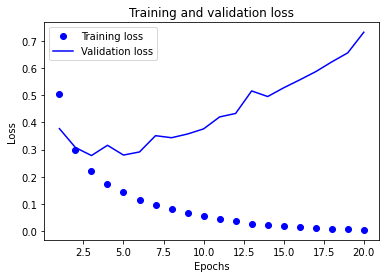

In [15]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### Plotting the training and validation accuracy

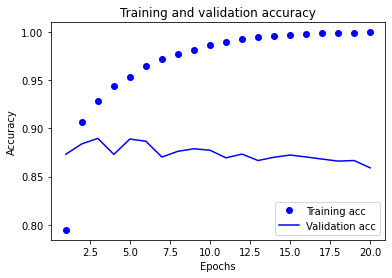

In [16]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Retraining a model from scratch

In [17]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 13ms/step - loss: 0.4506 - accuracy: 0.8216
Epoch 2/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2607 - accuracy: 0.9113
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2022 - accuracy: 0.9285
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2932 - accuracy: 0.8820


In [18]:
results

[0.29317834973335266, 0.8820400238037109]

### Using a trained model to generate predictions on new data

In [19]:
model.predict(x_test)

array([[0.17484373],
       [0.9990572 ],
       [0.76387787],
       ...,
       [0.10838601],
       [0.07343218],
       [0.54741603]], dtype=float32)

In [20]:
x_test

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [21]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

### Classifying newswires: a multiclass classification example
#### The Reuters dataset
#### Loading the Reuters dataset

In [47]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)



In [48]:
reuters.load_data()

((array([list([1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
         list([1, 3267, 699, 3434, 2295, 56, 16784, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 19261, 49, 2295, 13415, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 13415, 30625, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
         list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 

In [49]:
len(train_data)

8982

In [50]:
len(test_data)

2246

In [51]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

####  Decoding newswires back to text

In [52]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [53]:
train_labels[10]

3

In [54]:
train_data

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

In [79]:
train_labels[0:20]

array([ 3,  4,  3,  4,  4,  4,  4,  3,  3, 16,  3,  3,  4,  4, 19,  8, 16,
        3,  3, 21], dtype=int64)

#### Now here we are checking how many classes we have, labels means classes.

In [82]:
np.max(train_labels)

45

In [83]:
y_train.shape

(8982, 46)

In [84]:
y_test.shape

(2246, 46)

### Preparing the data
#### Encoding the input data

In [74]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_train.shape

(8982, 10000)

In [75]:
x_test.shape

(2246, 10000)

In [78]:
x_train[0:20]

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

#### Encoding the labels

In [57]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [58]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [85]:
y_train.shape

(8982, 46)

In [86]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [87]:
train_labels[0]

3

In [59]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model
#### Model definition

In [60]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

#### Compiling the model

In [61]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach
#### Setting aside a validation set

In [62]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

#### Training the model

In [90]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/10
16/16 [==============================] - 0s 26ms/step - loss: 0.0989 - accuracy: 0.9578 - val_loss: 0.5077 - val_accuracy: 0.9080
Epoch 2/10
16/16 [==============================] - 0s 26ms/step - loss: 0.0929 - accuracy: 0.9587 - val_loss: 0.5363 - val_accuracy: 0.8980
Epoch 3/10
16/16 [==============================] - 0s 25ms/step - loss: 0.0961 - accuracy: 0.9597 - val_loss: 0.5707 - val_accuracy: 0.8880
Epoch 4/10
16/16 [==============================] - 0s 24ms/step - loss: 0.0970 - accuracy: 0.9574 - val_loss: 0.5362 - val_accuracy: 0.9010
Epoch 5/10
16/16 [==============================] - 0s 25ms/step - loss: 0.0926 - accuracy: 0.9583 - val_loss: 0.5836 - val_accuracy: 0.8930
Epoch 6/10
16/16 [==============================] - 0s 23ms/step - loss: 0.0925 - accuracy: 0.9590 - val_loss: 0.5495 - val_accuracy: 0.9020
Epoch 7/10
16/16 [==============================] - 0s 29ms/step - loss: 0.0926 - accuracy: 0.9572 - val_loss: 0.6130 - val_accuracy: 0.8840
Epoch 8/10
16

#### Plotting the training and validation loss

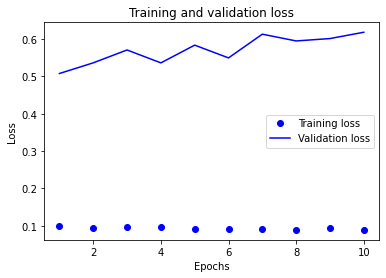

In [91]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### Plotting the training and validation accuracy

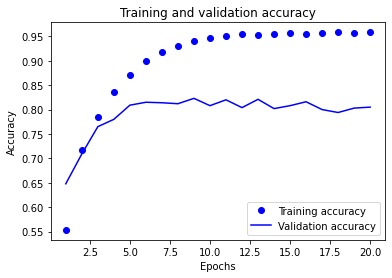

In [65]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Retraining a model from scratch

In [66]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 24ms/step - loss: 2.7234 - accuracy: 0.4942
Epoch 2/9
18/18 [==============================] - 0s 23ms/step - loss: 1.4297 - accuracy: 0.7051
Epoch 3/9
18/18 [==============================] - 0s 23ms/step - loss: 1.0295 - accuracy: 0.7867
Epoch 4/9
18/18 [==============================] - 0s 24ms/step - loss: 0.7981 - accuracy: 0.8360
Epoch 5/9
18/18 [==============================] - 0s 23ms/step - loss: 0.6337 - accuracy: 0.8711
Epoch 6/9
18/18 [==============================] - 1s 32ms/step - loss: 0.5073 - accuracy: 0.8974
Epoch 7/9
18/18 [==============================] - 0s 24ms/step - loss: 0.4084 - accuracy: 0.9166
Epoch 8/9
18/18 [==============================] - 0s 22ms/step - loss: 0.3339 - accuracy: 0.9303
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 0.9536 - accuracy: 0.7961


In [67]:
results

[0.9536229372024536, 0.7960819005966187]

In [68]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.18744434550311664

### Generating predictions on new data

In [69]:
predictions = model.predict(x_test)

predictions

array([[5.18675915e-06, 2.20784641e-04, 1.12728067e-05, ...,
        1.05242543e-04, 2.63755792e-05, 4.75931120e-06],
       [2.60944106e-03, 3.72580662e-02, 1.78230122e-01, ...,
        2.71765835e-04, 2.19638696e-05, 1.39847118e-03],
       [5.06680366e-03, 7.23234534e-01, 3.80612314e-02, ...,
        4.45008511e-04, 6.78985816e-05, 7.49239372e-03],
       ...,
       [6.70075451e-06, 4.53413697e-04, 2.64868731e-06, ...,
        7.15553551e-06, 2.62252088e-05, 2.01043240e-05],
       [9.84410476e-03, 1.27107009e-01, 1.58854891e-02, ...,
        7.18860654e-04, 9.81347170e-04, 4.89752134e-03],
       [2.51899270e-04, 1.75072104e-01, 1.02541745e-02, ...,
        8.92831828e-04, 4.70065512e-04, 4.87744715e-03]], dtype=float32)

In [70]:
predictions[0].shape

(46,)

In [71]:
np.sum(predictions[0])

1.0000001

In [72]:
np.argmax(predictions[0])

3